# Haber et. al dataset preparation and minor analysis

In [1]:
import os
os.chdir("../")

In [2]:
import scanpy as sc
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import colors
import seaborn as sb

In [3]:
sc.settings.set_figure_params(dpi=200)

In [4]:
adata = sc.read('./data/haber/haber_count.h5ad')
adata

AnnData object with n_obs × n_vars = 9842 × 15215 
    obs: 'batch', 'barcode', 'condition', 'cell_label'

In [5]:
adata.obs['condition'].value_counts()

Control        3240
Hpoly.Day10    2711
Hpoly.Day3     2121
Salmonella     1770
Name: condition, dtype: int64

In [6]:
sc.pp.normalize_per_cell(adata)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, n_top_genes=1000)

In [7]:
adata = adata[:, adata.var['highly_variable']]

In [8]:
adata

View of AnnData object with n_obs × n_vars = 9842 × 1000 
    obs: 'batch', 'barcode', 'condition', 'cell_label', 'n_counts'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'

In [9]:
adata.X.min(), adata.X.max()

(ArrayView(0., dtype=float32), ArrayView(7.840002, dtype=float32))

In [10]:
adata.obs['cell_label'].value_counts()

TA.Early                 1970
Stem                     1857
Enterocyte.Progenitor    1822
Enterocyte               1458
TA                       1188
Goblet                    758
Tuft                      409
Endocrine                 380
Name: cell_label, dtype: int64

In [15]:
os.makedirs("./data/haber/", exist_ok=True)

In [35]:
adata.write_h5ad("./data/haber/haber_normalized.h5ad")

In [23]:
special_cell_type = "Tuft"

In [24]:
cell_type_adata = adata[adata.obs["cell_label"] == special_cell_type]

In [25]:
cell_type_adata.obs['condition'].value_counts()

Hpoly.Day10    217
Hpoly.Day3     110
Control         60
Salmonella      22
Name: condition, dtype: int64

In [26]:
cell_type_adata.obs['condition'].cat.categories

Index(['Control', 'Hpoly.Day3', 'Hpoly.Day10', 'Salmonella'], dtype='object')

In [27]:
sc.tl.rank_genes_groups(cell_type_adata, groups=["Hpoly.Day3", 'Hpoly.Day10'], groupby="condition", reference='Control', n_genes=10)

In [30]:
top_genes = cell_type_adata.uns['rank_genes_groups']['names']['Hpoly.Day10']
top_genes

array(['Defa24', 'Gm15284', 'Defa17', 'Reg3g', 'Reg3b', 'Lyz1', 'Defa22',
       'AA467197', 'Itln1', 'AY761184'], dtype='<U50')

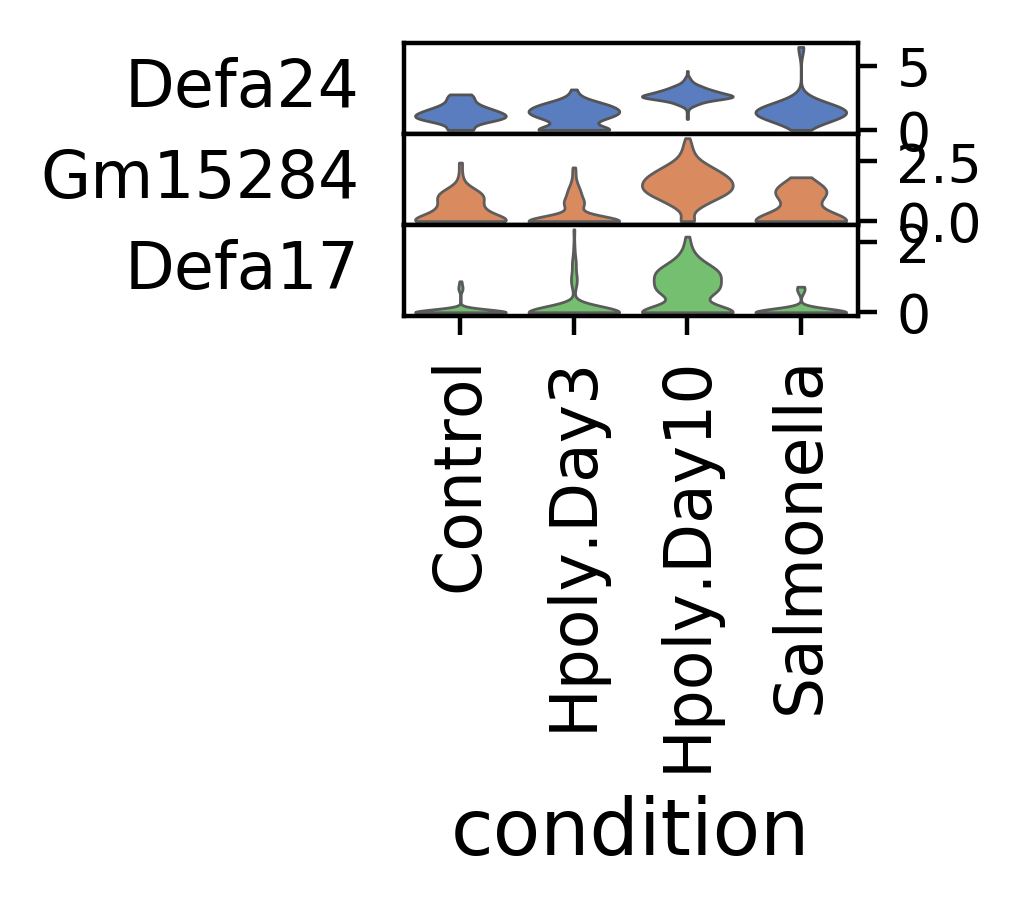

In [32]:
sc.pl.stacked_violin(cell_type_adata, groupby='condition', var_names=top_genes[:3], swap_axes=True)